-----------------------

In [41]:
!pip install autogluon
# !pip install autogluon scikit-learn==1.5.2

# Install Packages and Libraries
from scipy import stats
import missingno as msno
import pylab
import calendar
import numpy as np 
import pandas as pd 
from autogluon.tabular import TabularPredictor
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


## Exploring Dataset

In [2]:
train = pd.read_csv("/kaggle/input/bike-sharing-demand/train.csv")
test = pd.read_csv("/kaggle/input/bike-sharing-demand/test.csv")
submission = pd.read_csv("/kaggle/input/bike-sharing-demand/sampleSubmission.csv")

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [5]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


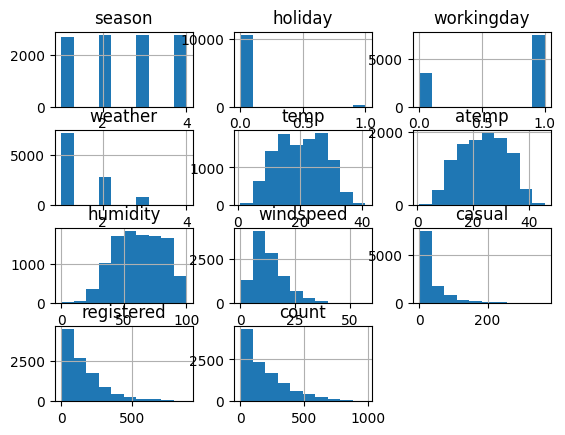

In [6]:
train.hist();

In [7]:
train.apply(lambda x: len(x.unique()))

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

-----------------------------

# AutoGluon

## Train a model using AutoGluon's Tabular Prediction

In [8]:
train_for_autogluon = train.drop(["casual", "registered"], axis=1)

predictor = TabularPredictor(label="count", eval_metric="rmse").fit(
    train_for_autogluon, 
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250520_084408"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Nov 10 10:07:59 UTC 2024
CPU Count:          4
Memory Avail:       29.94 GB / 31.35 GB (95.5%)
Disk Space Avail:   19.50 GB / 19.52 GB (99.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be 

(_ray_fit pid=524) [1000]	valid_set's rmse: 129.692
(_ray_fit pid=663) [1000]	valid_set's rmse: 128.154 [repeated 6x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=695) [2000]	valid_set's rmse: 134.443 [repeated 5x across cluster]
(_ray_fit pid=663) [6000]	valid_set's rmse: 125.468 [repeated 10x across cluster]
(_ray_fit pid=758) [5000]	valid_set's rmse: 137.961 [repeated 10x across cluster]


(_dystack pid=307) 	-131.9758	 = Validation score   (-root_mean_squared_error)
(_dystack pid=307) 	42.83s	 = Training   runtime
(_dystack pid=307) 	12.96s	 = Validation runtime
(_dystack pid=307) Fitting model: LightGBM_BAG_L1 ... Training model for up to 36.97s of the 84.57s of remaining time.
(_dystack pid=307) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.04%)


(_ray_fit pid=805) [1000]	valid_set's rmse: 129.274 [repeated 6x across cluster]
(_ray_fit pid=936) [1000]	valid_set's rmse: 124.896 [repeated 3x across cluster]


(_dystack pid=307) 	-131.8496	 = Validation score   (-root_mean_squared_error)
(_dystack pid=307) 	20.55s	 = Training   runtime
(_dystack pid=307) 	1.43s	 = Validation runtime
(_dystack pid=307) Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 11.92s of the 59.52s of remaining time.
(_dystack pid=307) /usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
(_dystack pid=307)   warnings.warn(
(_dystack pid=307) 	-119.5485	 = Validation score   (-root_mean_squared_error)
(_dystack pid=307) 	7.72s	 = Training   runtime
(_dystack pid=307) 	0.67s	 = Validation runtime
(_dystack pid=307) Fitting model: CatBoost_BAG_L1 ... Training model for up to 3.04s of the 50.64s of remaining time.
(_dystack pid=307) 	Fitting 8 child models (S1F1 - S1F8) | Fitti

(_ray_fit pid=1220) [1000]	valid_set's rmse: 69.3494 [repeated 4x across cluster]
(_ray_fit pid=1394) [1000]	valid_set's rmse: 75.9058 [repeated 4x across cluster]


(_dystack pid=307) 	-73.7422	 = Validation score   (-root_mean_squared_error)
(_dystack pid=307) 	36.54s	 = Training   runtime
(_dystack pid=307) 	2.38s	 = Validation runtime
(_dystack pid=307) Fitting model: WeightedEnsemble_L3 ... Training model for up to 142.76s of the -1.62s of remaining time.
(_dystack pid=307) 	Ensemble Weights: {'LightGBMXT_BAG_L2': 0.96, 'KNeighborsDist_BAG_L1': 0.04}
(_dystack pid=307) 	-73.7128	 = Validation score   (-root_mean_squared_error)
(_dystack pid=307) 	0.02s	 = Training   runtime
(_dystack pid=307) 	0.0s	 = Validation runtime
(_dystack pid=307) AutoGluon training complete, total runtime = 144.53s ... Best model: WeightedEnsemble_L3 | Estimated inference throughput: 71.8 rows/s (1210 batch size)
(_dystack pid=307) TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/kaggle/working/AutogluonModels/ag-20250520_084408/ds_sub_fit/sub_fit_ho")
(_dystack pid=307) Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The work

### Review AutoGluon's training run with ranking of models that did the best.

In [9]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.029175  root_mean_squared_error      16.510704  354.957302                0.000783           0.061039            3       True         14
1   RandomForestMSE_BAG_L2  -53.360363  root_mean_squared_error      16.178213  300.913270                0.729268          24.108105            2       True         12
2          LightGBM_BAG_L2  -54.877378  root_mean_squared_error      15.708328  293.388334                0.259384          16.583169            2       True         11
3          CatBoost_BAG_L2  -55.551388  root_mean_squared_error      15.521269  314.204989                0.072324          37.399824            2       True         13
4        LightGBMXT_BAG_L2  -60.702345  root_mean_squared_error      20.580316  310.830971   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.56118165528414,
  'KNeighborsDist_BAG_L1': -84.13501071997395,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54

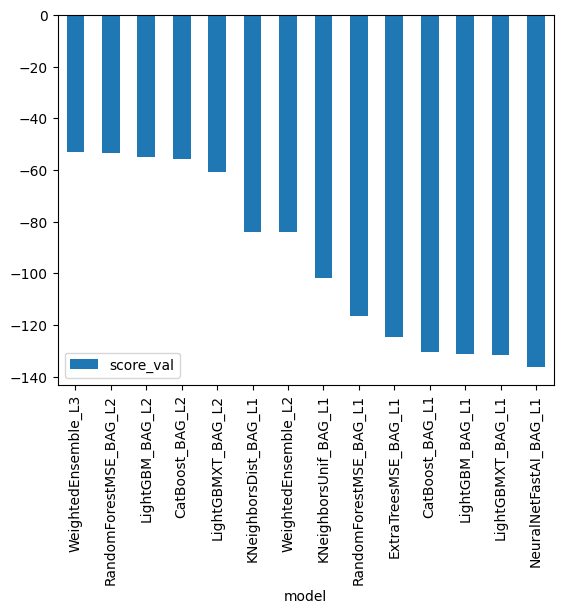

In [10]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val");

In [16]:
predictor.model_best

'WeightedEnsemble_L3'

### Create predictions from test dataset

In [11]:
predictions = predictor.predict(test)
predictions.head()

0    23.080675
1    41.550404
2    46.431904
3    49.584167
4    51.972294
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [12]:
print(predictions[predictions < 0])
print(predictions[predictions < 0].sum())

Series([], Name: count, dtype: float32)
0.0


### Set predictions to submission dataframe, save, and submit

In [17]:
first_submission = submission
first_submission["count"] = predictions
first_submission.head()

,datetime,count
0,2011-01-20 00:00:00,23.080675
1,2011-01-20 01:00:00,41.550404
2,2011-01-20 02:00:00,46.431904
3,2011-01-20 03:00:00,49.584167
4,2011-01-20 04:00:00,51.972294


In [18]:
first_submission.to_csv("first_submission.csv", index=False)

### Some EDA

* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [19]:
train_for_autogluon['datetime'] = pd.to_datetime(train_for_autogluon['datetime'])
train_for_autogluon["day"] = train_for_autogluon["datetime"].dt.day
train_for_autogluon["month"] = train_for_autogluon["datetime"].dt.month
train_for_autogluon["hour"] = train_for_autogluon["datetime"].dt.hour
test['datetime'] = pd.to_datetime(test['datetime'])
test["day"] = test["datetime"].dt.day
test["month"] = test["datetime"].dt.month
test["hour"] = test["datetime"].dt.hour

train_for_autogluon["season"] = train_for_autogluon["season"].astype("category")
train_for_autogluon["weather"] = train_for_autogluon["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [20]:
train_for_autogluon.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1


## Rerun the model with the same settings as before, just with more features

In [21]:
predictor_new_features = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(
    train_for_autogluon, 
    time_limit=600,
    presets="best_quality"
)

predictor_new_features.fit_summary()

No path specified. Models will be saved in: "AutogluonModels/ag-20250520_091049"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Nov 10 10:07:59 UTC 2024
CPU Count:          4
Memory Avail:       28.53 GB / 31.35 GB (91.0%)
Disk Space Avail:   18.49 GB / 19.52 GB (94.8%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be 

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.196934  root_mean_squared_error      34.843453  380.493661                0.001045           0.063434            3       True         14
1          CatBoost_BAG_L2  -30.557377  root_mean_squared_error      31.588629  305.115639                0.134286          31.886954            2       True         13
2          LightGBM_BAG_L2  -30.583253  root_mean_squared_error      31.903896  292.774435                0.449553          19.545750            2       True         11
3        LightGBMXT_BAG_L2  -31.085222  root_mean_squared_error      33.477100  303.519005                2.022757          30.290319            2       True         10
4   RandomForestMSE_BAG_L2  -31.405469  root_mean_squared_error      32.235811  298.707204   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.56118165528414,
  'KNeighborsDist_BAG_L1': -84.13501071997395,
  'LightGBMXT_BAG_L1': -34.46184896828623,
  'LightGBM_BAG_L1': -33.916920183145294,
  'RandomForestMSE_BAG_L1': -38.44

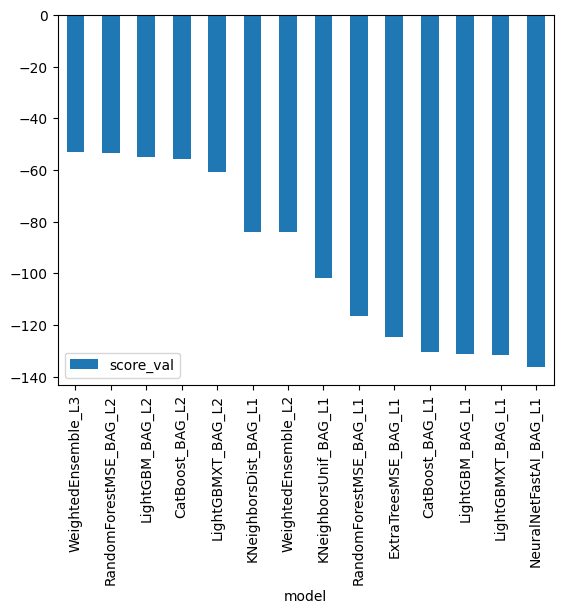

In [22]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val");

In [23]:
predictions_new_features = predictor_new_features.predict(test)
print(predictions_new_features[predictions_new_features < 0])

submission_new_features = submission
submission_new_features["count"] = predictions_new_features
submission_new_features.head()

Series([], Name: count, dtype: float32)


,datetime,count
0,2011-01-20 00:00:00,16.166294
1,2011-01-20 01:00:00,10.693330
2,2011-01-20 02:00:00,10.010004
3,2011-01-20 03:00:00,8.691433
4,2011-01-20 04:00:00,7.376699


In [24]:
submission_new_features.to_csv("submission_new_features.csv", index=False)

## Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [25]:
from autogluon.common import space

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 30,  # number of training epochs (controls training time of NN models)
    'learning_rate': space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'dropout_prob': space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

time_limit = 600  # train various models for ~5 min
num_trials = 20  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}  # Refer to TabularPredictor.fit docstring for all valid values

predictor_new_hpo = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(
    train_for_autogluon,
    time_limit=time_limit,
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

2025-05-20 09:29:34,135	INFO timeout.py:54 -- Reached timeout of 269.67579184770585 seconds. Stopping all trials.
2025-05-20 09:29:34,203	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/kaggle/working/AutogluonModels/ag-20250520_092450/models/NeuralNetTorch' in 0.0632s.
2025-05-20 09:29:34,725	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 19 trial(s):
- f90fe2e1: FileNotFoundError('Could not fetch metrics for f90fe2e1: both result.json and progress.csv were not found at /kaggle/working/AutogluonModels/ag-20250520_092450/models/NeuralNetTorch/f90fe2e1')
- 048ceeae: FileNotFoundError('Could not fetch metrics for 048ceeae: both result.json and progress.csv were not found at /kaggle/working/AutogluonModels/ag-20250520_092450/models/NeuralNetTorch/048ceeae')
- 99088573: FileNotFoundError('Could not fetch metrics for 99088573: both result.json and progress.csv were not found at /kaggle/working/AutogluonModels/ag-20250520_092450/

In [26]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2  -36.574802  root_mean_squared_error       0.238210  155.276571                0.000659           0.013902            2       True         39
1               LightGBM/T8  -37.384017  root_mean_squared_error       0.019104    0.611386                0.019104           0.611386            1       True          8
2              LightGBM/T10  -38.506105  root_mean_squared_error       0.013294    0.481275                0.013294           0.481275            1       True         10
3              LightGBM/T18  -38.536794  root_mean_squared_error       0.013493    0.488155                0.013493           0.488155            1       True         18
4               LightGBM/T3  -39.000534  root_mean_squared_error       0.015940    0.597

{'model_types': {'LightGBM/T1': 'LGBModel',
  'LightGBM/T2': 'LGBModel',
  'LightGBM/T3': 'LGBModel',
  'LightGBM/T4': 'LGBModel',
  'LightGBM/T5': 'LGBModel',
  'LightGBM/T6': 'LGBModel',
  'LightGBM/T7': 'LGBModel',
  'LightGBM/T8': 'LGBModel',
  'LightGBM/T9': 'LGBModel',
  'LightGBM/T10': 'LGBModel',
  'LightGBM/T11': 'LGBModel',
  'LightGBM/T12': 'LGBModel',
  'LightGBM/T13': 'LGBModel',
  'LightGBM/T14': 'LGBModel',
  'LightGBM/T15': 'LGBModel',
  'LightGBM/T16': 'LGBModel',
  'LightGBM/T17': 'LGBModel',
  'LightGBM/T18': 'LGBModel',
  'LightGBM/T19': 'LGBModel',
  'LightGBM/T20': 'LGBModel',
  'NeuralNetTorch/f90fe2e1': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/048ceeae': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/99088573': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/b757420c': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/cceea668': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/488196a4': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/36d8d525': 'TabularNeu

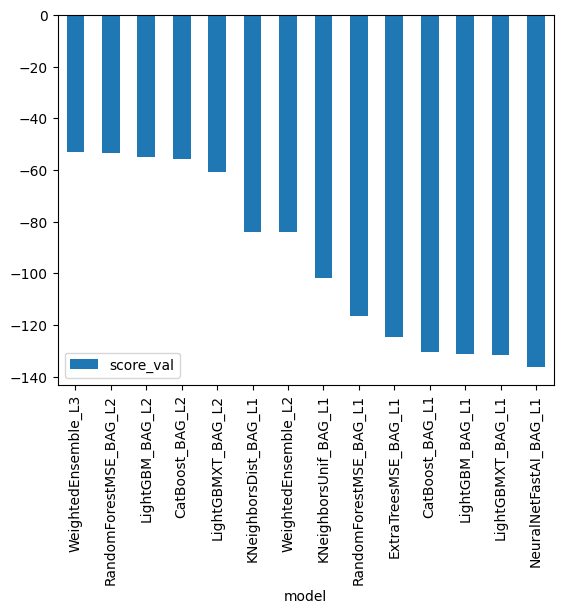

In [27]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val");

In [28]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo[predictions_new_hpo < 0] = 0
submission_new_hpo = submission
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,15.722072
1,2011-01-20 01:00:00,1.993851
2,2011-01-20 02:00:00,0.000000
3,2011-01-20 03:00:00,3.069271
4,2011-01-20 04:00:00,3.400984


In [29]:
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

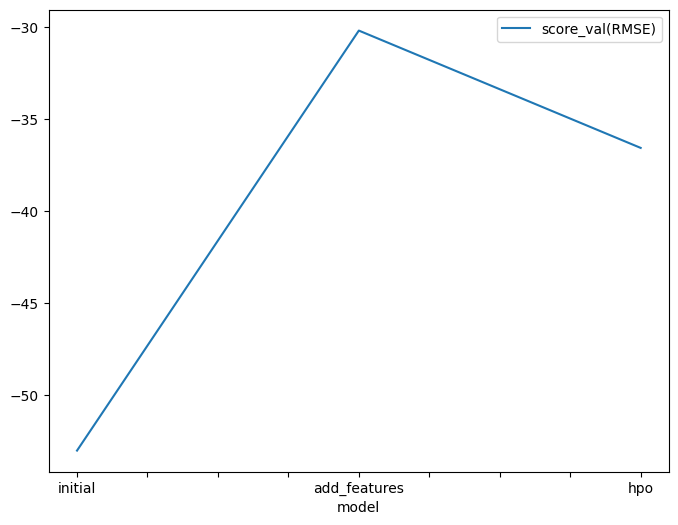

In [31]:
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score_val(RMSE)": [-53.029175, -30.196934, -36.574802]
    }
).plot(x="model", y="score_val(RMSE)", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

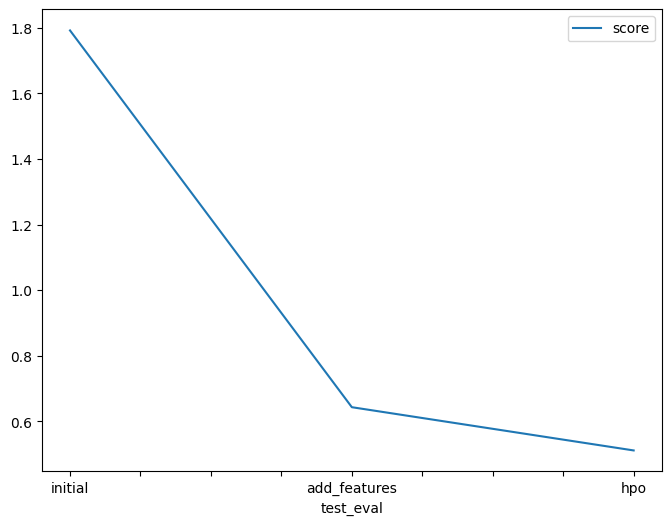

In [32]:
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.79214, 0.64351, 0.51168]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

-----------------

In [33]:
train = pd.read_csv("/kaggle/input/bike-sharing-demand/train.csv")
test = pd.read_csv("/kaggle/input/bike-sharing-demand/test.csv")
submission = pd.read_csv("/kaggle/input/bike-sharing-demand/sampleSubmission.csv")

## Missing Values Analysis

In [34]:
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

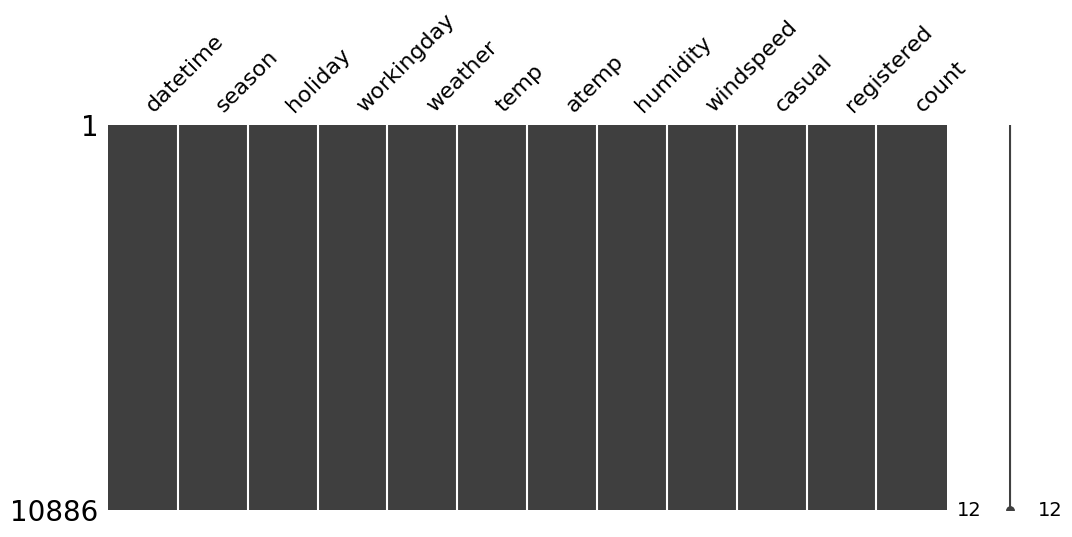

In [35]:
msno.matrix(train, figsize=(12, 5));

# EDA

In [36]:
from datetime import datetime
import calendar
# Extraction of time
def time_process(df):
    df['datetime'] = pd.to_datetime(df['datetime'])
    # Year, month, day, hour feature extraction
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    # Label the number of weeks of the date to explore the characteristics of weekdays
    df['week'] = df['datetime'].dt.isocalendar().week
    df['weekday'] = df['datetime'].dt.dayofweek
    return df

train = time_process(train)
test = time_process(test)

In [ ]:
# month_map = {
#     'January': 1, 'February': 2, 'March': 3, 'April': 4,
#     'May': 5, 'June': 6, 'July': 7, 'August': 8,
#     'September': 9, 'October': 10, 'November': 11, 'December': 12
# }

# train['month'] = train['month'].map(month_map).astype(int)

# You don't need to use these, but you can use if you want it.

In [37]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,week,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,52,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,52,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,52,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,52,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,52,5


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  week        10886 non-

In [42]:
# Wind speed has many missing values, try to use random forest based on temperature, seasonal interpolation
# We can use Random Forest Regressor but Classifier is better than that according to my observations
from sklearn.ensemble import RandomForestClassifier
def wind_0_fill(df):
    wind_0 = df[df['windspeed'] == 0]
    wind_not0 = df[df['windspeed'] != 0]
    y_label = wind_not0['windspeed']
    # Guess the wind speed is related to the weather and the time of day.
    clf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
    windcolumns = ['season', 'weather', 'temp', 'atemp', 'humidity', 'hour', 'month', "year"] # I added year as an extra.
    clf.fit(wind_not0[windcolumns], y_label.astype('int'))
    pred_y = clf.predict(wind_0[windcolumns])
    # Forecast results populated
    wind_0['windspeed'] = pred_y
    df_rfw = pd.concat([wind_0, wind_not0]) # wind_not0.append(wind_0)
    df_rfw.reset_index(inplace=True)
    # df_rfw.drop(columns=['index'], inplace=True, axis=1)
    return df_rfw

train = wind_0_fill(train)
test = wind_0_fill(test)

In [43]:
train.head()

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,week,weekday
0,0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,6.0,3,13,16,2011,1,1,0,52,5
1,1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,6.0,8,32,40,2011,1,1,1,52,5
2,2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,6.0,5,27,32,2011,1,1,2,52,5
3,3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,6.0,3,10,13,2011,1,1,3,52,5
4,4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,6.0,0,1,1,2011,1,1,4,52,5


In [44]:
# Change row index to datetime
train.set_index(pd.to_datetime(train["datetime"]), inplace=True)
test.set_index(pd.to_datetime(test["datetime"]), inplace=True)

def get_day(day_start):
    day_end = day_start + pd.offsets.DateOffset(hours=23)
    return pd.date_range(day_start, day_end, freq="H")

# Tax Day, Still Need to Work
train.loc[get_day(datetime(2011, 4, 15)), "workingday"] = 1
train.loc[get_day(datetime(2012, 4, 16)), "workingday"] = 1
# Thanksgiving without work
test.loc[get_day(datetime(2011, 11, 25)), "workingday"] = 0
test.loc[get_day(datetime(2012, 11, 23)), "workingday"] = 0
#Christmas, no work
test.loc[get_day(datetime(2011, 12, 24)), "workingday"] = 0
test.loc[get_day(datetime(2011, 12, 31)), "workingday"] = 0
test.loc[get_day(datetime(2012, 12, 26)), "workingday"] = 0
test.loc[get_day(datetime(2012, 12, 31)), "workingday"] = 0
# Tax Day, No Holiday
train.loc[get_day(datetime(2011, 4, 15)), "holiday"] = 0
train.loc[get_day(datetime(2012, 4, 16)), "holiday"] = 0
# Thanksgiving. Vacation.
test.loc[get_day(datetime(2011, 12, 24)), "holiday"] = 1
test.loc[get_day(datetime(2011, 12, 31)), "holiday"] = 1
test.loc[get_day(datetime(2012, 12, 31)), "holiday"] = 1
# Heavy rain
test.loc[get_day(datetime(2012, 5, 21)), "holiday"] = 1
# Tsunami
train.loc[get_day(datetime(2012, 6, 1)), "holiday"] = 1

In [45]:
def name_process(df):
    # Seasons, weather renamed, subsequent models will be coded with solo heat, easy to visualize
    df['season2'] = df['season']
    df['weather2'] = df['weather']
    df['season2'] = df['season2'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
    df['weather2'] = df['weather2'].map({1: 'Clear', 2: 'Mist', 3: 'Light_Snow', 4: 'Heavy_Rain'})
    # df['month'] = df['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})   
    return df

train = name_process(train)
test = name_process(test)

In [46]:
train.head()

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,...,registered,count,year,month,day,hour,week,weekday,season2,weather2
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,6.0,...,13,16,2011,1,1,0,52,5,Spring,Clear
2011-01-01 01:00:00,1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,6.0,...,32,40,2011,1,1,1,52,5,Spring,Clear
2011-01-01 02:00:00,2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,6.0,...,27,32,2011,1,1,2,52,5,Spring,Clear
2011-01-01 03:00:00,3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,6.0,...,10,13,2011,1,1,3,52,5,Spring,Clear
2011-01-01 04:00:00,4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,6.0,...,1,1,2011,1,1,4,52,5,Spring,Clear


## Outlier Analysis

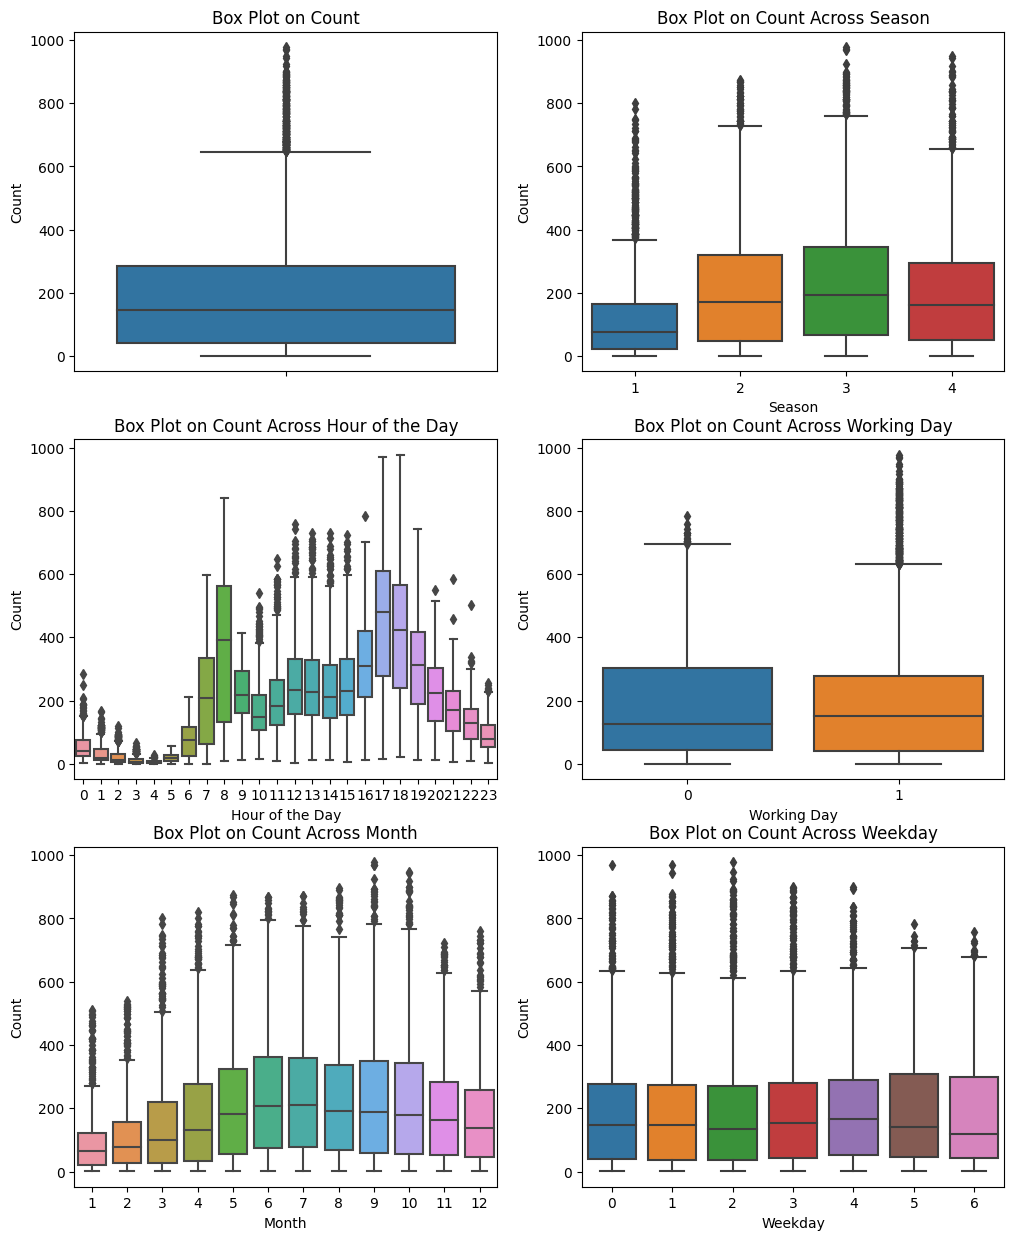

In [47]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(12, 15)
sns.boxplot(data=train, y="count", orient="v", ax=axes[0][0])
sns.boxplot(data=train, y="count", x="season", orient="v", ax=axes[0][1])
sns.boxplot(data=train, y="count", x="hour", orient="v", ax=axes[1][0])
sns.boxplot(data=train, y="count", x="workingday", orient="v", ax=axes[1][1])
sns.boxplot(data=train, y='count', x='month', orient="v", ax=axes[2][0])
sns.boxplot(data=train, y='count', x='weekday', orient="v", ax=axes[2][1])

axes[0][0].set(ylabel="Count", title="Box Plot on Count")
axes[0][1].set(xlabel="Season", ylabel="Count", title="Box Plot on Count Across Season")
axes[1][0].set(xlabel="Hour of the Day", ylabel="Count", title="Box Plot on Count Across Hour of the Day")
axes[1][1].set(xlabel="Working Day", ylabel="Count", title="Box Plot on Count Across Working Day")
axes[2][0].set(xlabel="Month", ylabel="Count", title="Box Plot on Count Across Month")
axes[2][1].set(xlabel="Weekday", ylabel="Count", title="Box Plot on Count Across Weekday")
plt.show()

* We can use sns.pointplot() for the *Hour of the Day* graph. If we use hue attribute, then we can understand which days are most preferred at which time of the day.

```sns.pointplot(data=train, y="count", x="hour", hue="weekday", orient="v", ax=axes[1][0])```

* I tried it, but the result pattern was similar to above box plot so that is why I didn't use this method.
* And here, We wanna find the **outliers**.

In [48]:
# 147 outliers removed
outliers = np.abs(train['count'] - train['count'].mean()) > (3 * train['count'].std())
outliers_num = len(train[outliers])
train.drop(index=train[outliers].index)
print("Deleted",outliers_num,"Outliers")

Deleted 147 Outliers


In [49]:
# Interpret peak usage times based on data
train['peak'] = train[['hour', 'workingday']].apply(lambda x: (0, 1)[(x['workingday'] == 1 and  ( (x['hour'] == 8) or (17 <= x['hour'] <= 18) or (12 <= x['hour'] <= 12))) or ((x['workingday'] == 0) and  (10 <= x['hour'] <= 19))], axis = 1)
test['peak'] = test[['hour', 'workingday']].apply(lambda x: (0, 1)[(x['workingday'] == 1 and  ( (x['hour'] == 8) or (17 <= x['hour'] <= 18) or (12 <= x['hour'] <= 12))) or ((x['workingday'] == 0) and  (10 <= x['hour'] <= 19))], axis = 1)

In [50]:
train.head()

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,...,count,year,month,day,hour,week,weekday,season2,weather2,peak
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,6.0,...,16,2011,1,1,0,52,5,Spring,Clear,0
2011-01-01 01:00:00,1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,6.0,...,40,2011,1,1,1,52,5,Spring,Clear,0
2011-01-01 02:00:00,2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,6.0,...,32,2011,1,1,2,52,5,Spring,Clear,0
2011-01-01 03:00:00,3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,6.0,...,13,2011,1,1,3,52,5,Spring,Clear,0
2011-01-01 04:00:00,4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,6.0,...,1,2011,1,1,4,52,5,Spring,Clear,0


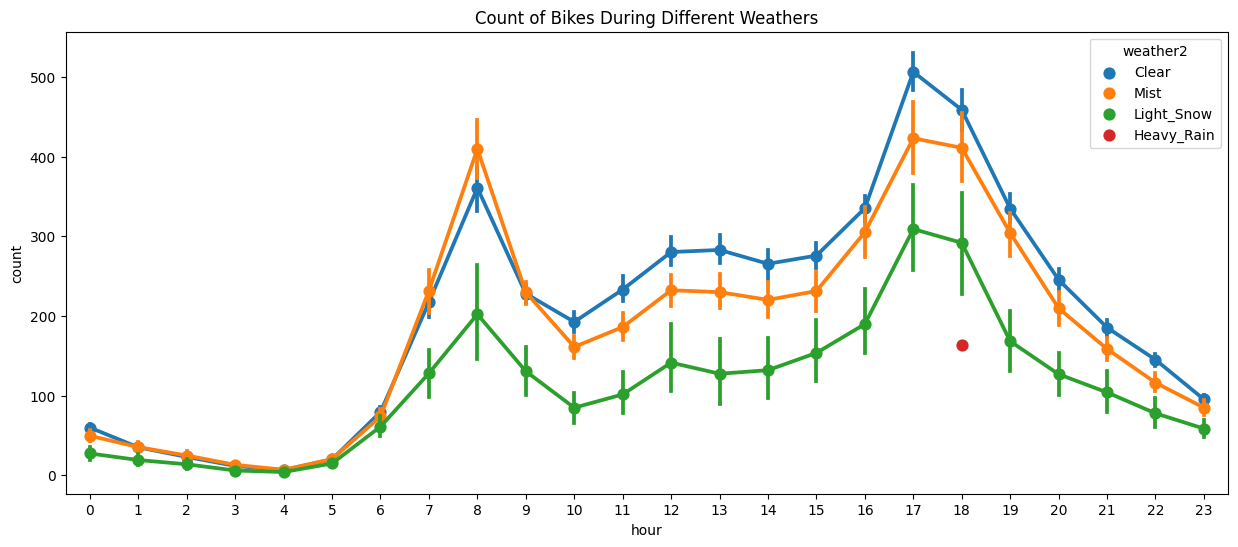

In [51]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.pointplot(data=train, x="hour", y="count", hue="weather2", ax=ax)
ax.set(title="Count of Bikes During Different Weathers");

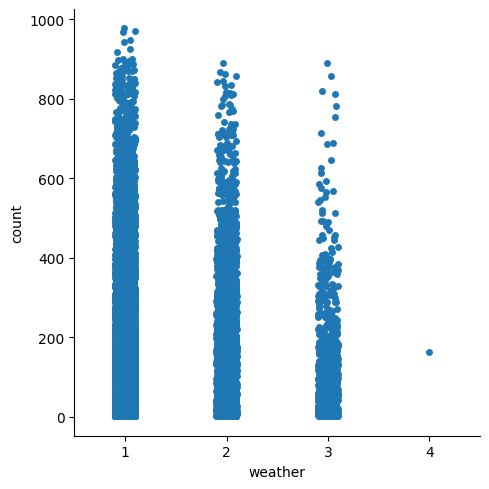

In [52]:
sns.catplot(data=train, x='weather', y='count', ax=ax);

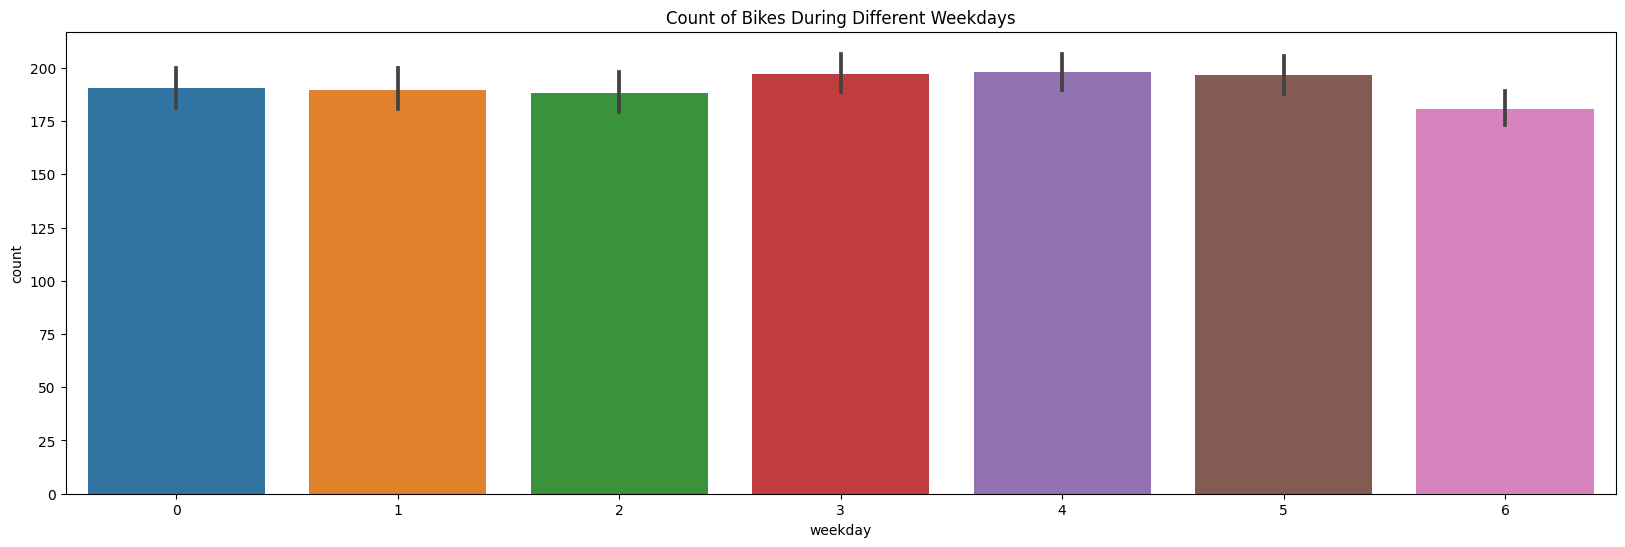

In [53]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(data=train, x="weekday", y="count", ax=ax)

ax.set(title="Count of Bikes During Different Weekdays");

## Correlation Analysis

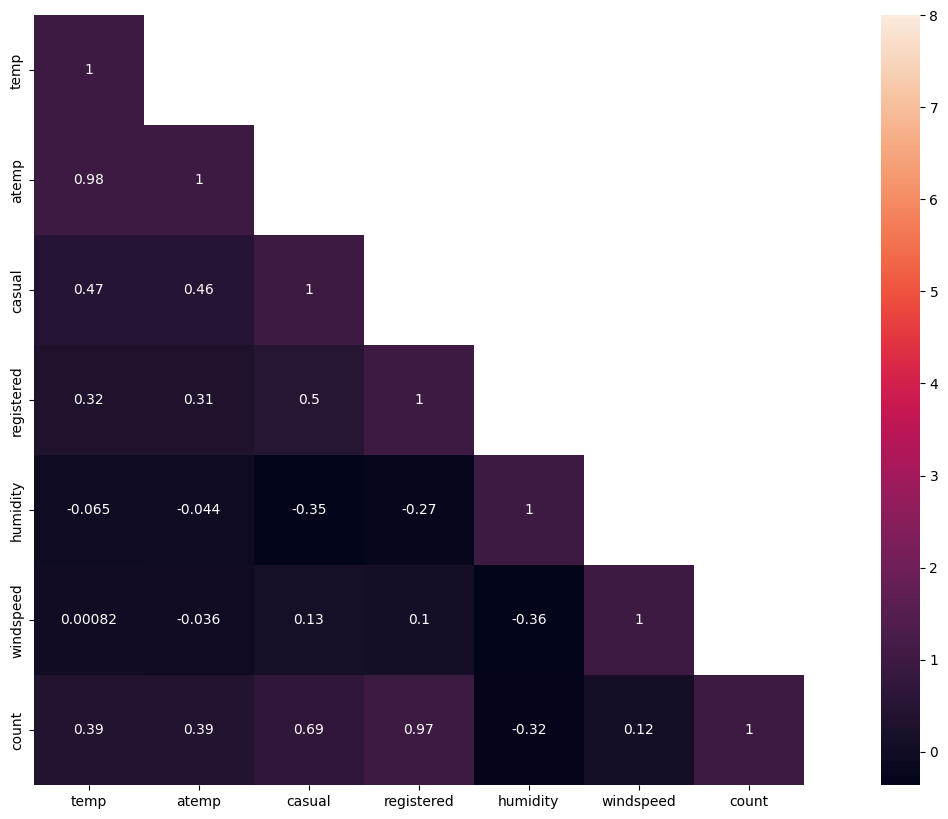

In [54]:
corrMat = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]].corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corrMat, mask=mask, vmax=8, square=True, annot=True);

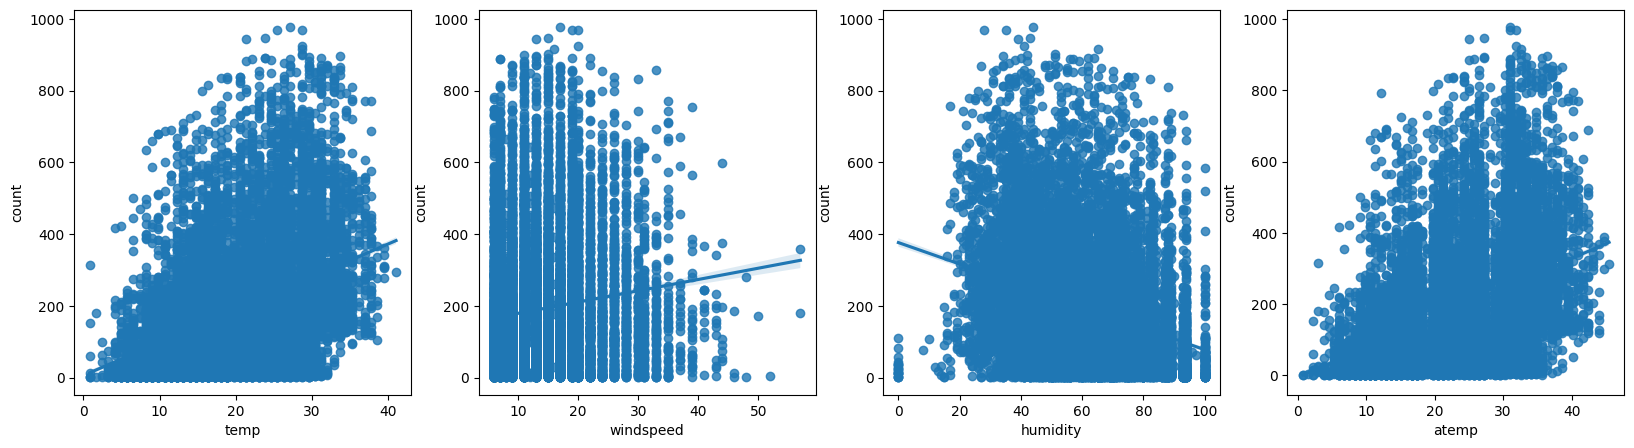

In [55]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4)
fig.set_size_inches(20, 5)

sns.regplot(x="temp", y="count", data=train, ax=ax1)
sns.regplot(x="windspeed", y="count", data=train, ax=ax2)
sns.regplot(x="humidity", y="count", data=train, ax=ax3)
sns.regplot(x="atemp", y="count", data=train, ax=ax4)
plt.show()

## Visualizing Distribution of Data

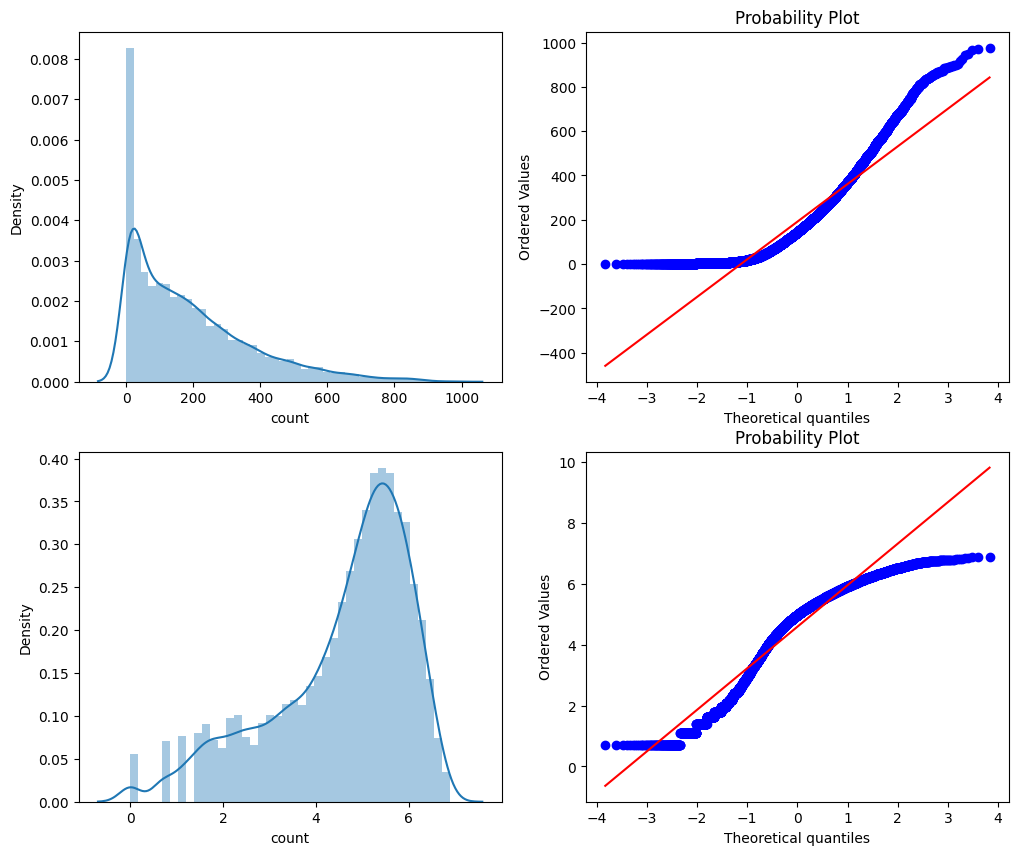

In [56]:
fig, axes = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(12, 10)
sns.distplot(train["count"], ax=axes[0][0])
stats.probplot(train["count"], dist="norm", fit=True, plot=axes[0][1])
sns.distplot(np.log(train["count"]), ax=axes[1][0])
stats.probplot(np.log1p(train["count"]), dist="norm", fit=True, plot=axes[1][1])
plt.show()

# Sample normal distribution in general
# train['count'].plot(kind='kde');
# Perform log1p transformations
# import math
# train['count_log'] = train['count'].apply(lambda x: math.log(x+1))
# train['count_log'].plot(kind='kde');

## Visualizing Count vs (Month, Season, Hour, Weekday, and UserType)

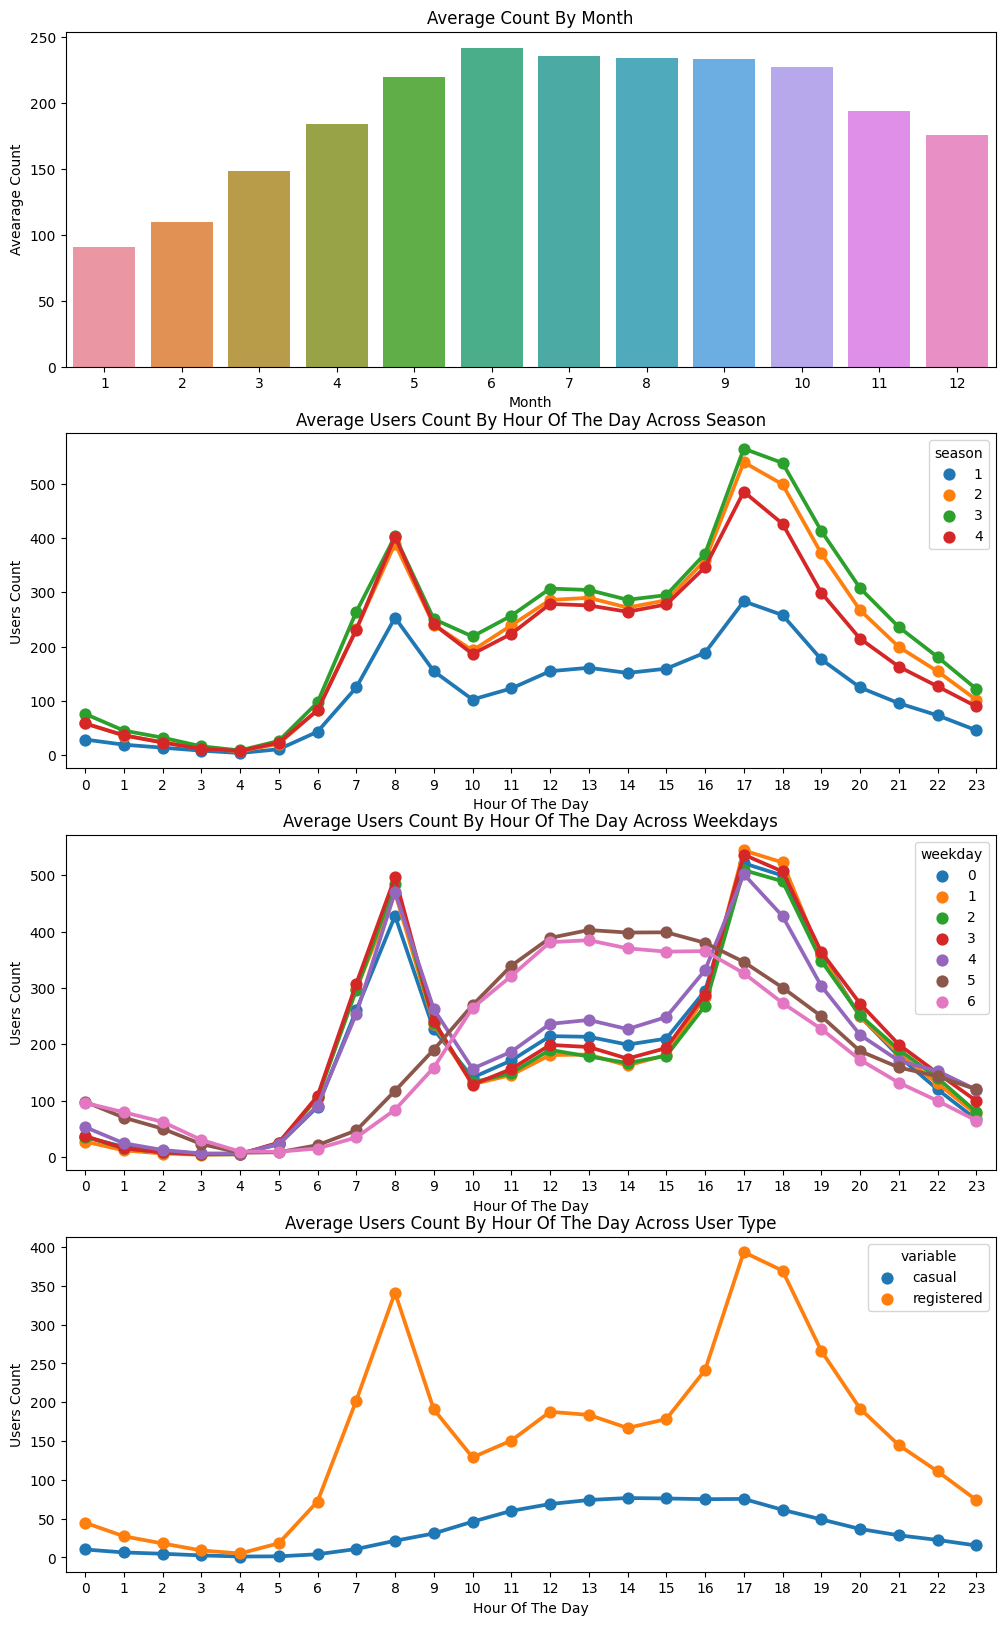

In [57]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(nrows=4)
fig.set_size_inches(12, 20)
# sortOrder = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
# hueOrder = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

monthAggregated = pd.DataFrame(train.groupby("month")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="count", ascending=False)
sns.barplot(data=monthSorted, x="month", y="count", ax=ax1,) # order=sortOrder
ax1.set(xlabel='Month', ylabel='Avearage Count', title="Average Count By Month")

hourAggregated = pd.DataFrame(train.groupby(["hour", "season"], sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"], hue=hourAggregated["season"], data=hourAggregated, join=True, ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count', title="Average Users Count By Hour Of The Day Across Season", label='big')

hourAggregated = pd.DataFrame(train.groupby(["hour", "weekday"], sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"], hue=hourAggregated["weekday"], data=hourAggregated, join=True, ax=ax3) # hue_order=hueOrder
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

hourTransformed = pd.melt(train[["hour", "casual", "registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour", "variable"],sort=True)["value"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"], hue=hourAggregated["variable"], hue_order=["casual", "registered"], data=hourAggregated, join=True, ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count', title="Average Users Count By Hour Of The Day Across User Type", label='big')
plt.show()

In [58]:
# Unique heat coding for seasons, weather, weekdays, etc., and retaining the original attribute coding for subsequent feature selection.
train = pd.get_dummies(train, columns=['season2'])
train = pd.get_dummies(train, columns=['weather2'])

test = pd.get_dummies(test, columns=['season2'])
test = pd.get_dummies(test, columns=['weather2'])

In [59]:
All_feature_columns = ['season','weather','temp','atemp','humidity','windspeed',
                        'year','holiday','workingday','month','day','hour','week','weekday','peak',
                       'season2_Fall','season2_Spring','season2_Summer','season2_Winter',
                       'weather2_Clear','weather2_Heavy_Rain','weather2_Light_Snow','weather2_Mist']

RFR_feature_columns = ['weather','temp','atemp','windspeed',
                       'workingday','season','holiday',
                       'hour','weekday','week','peak',
                       'season2_Fall','season2_Spring','season2_Summer','season2_Winter',
                      'weather2_Clear','weather2_Heavy_Rain','weather2_Light_Snow','weather2_Mist']

GBR_feature_columns =['weather','temp','atemp','humidity','windspeed',
                       'holiday','workingday','season',
                       'hour','weekday','year',
                      'season2_Fall','season2_Spring','season2_Summer','season2_Winter',
                       'weather2_Clear','weather2_Heavy_Rain','weather2_Light_Snow','weather2_Mist']

In [60]:
# Splitting out the training data
RFR_X_train = train[RFR_feature_columns].values
RFR_X_test = test[RFR_feature_columns].values

GBR_X_train = train[GBR_feature_columns].values
GBR_X_test = test[GBR_feature_columns].values

y_casual = train['casual'].apply(lambda x: np.log1p(x)).values
y_registered = train['registered'].apply(lambda x: np.log1p(x)).values
y_count = train['count'].apply(lambda x: np.log1p(x)).values

X_date = test['datetime'].values

In [61]:
def rmsle(y_real, y_pre):    
    log1 = np.log(y_real + 1)
    log2 = np.log(y_pre + 1)    
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [62]:
# Split model training set
from sklearn.model_selection import train_test_split
X_train = train[All_feature_columns].values
xd_train, xd_test, yd_train, yd_test = train_test_split(X_train, y_count, random_state=0)
# Train, tune, and test various regression models
# LGBM
from lightgbm import LGBMRegressor
def LGBM_model():
    LGBM = LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=1200,
                                learning_rate=0.17, n_estimators=1000, max_depth=10,
                                metric='rmse', bagging_fraction=0.8, feature_fraction=0.8, reg_lambda=0.9)
    LGBM.fit(xd_train, yd_train)
    pre_test = LGBM.predict(xd_test)
    score = rmsle(yd_test, pre_test)
    return score
# Random Forest
from sklearn.ensemble import RandomForestRegressor
def RandomForest_model():
    RFR = RandomForestRegressor(n_estimators=1000, max_depth=15, random_state=0, n_jobs=-1)
    RFR.fit(xd_train, yd_train)
    pre_test = RFR.predict(xd_test)
    score = rmsle(yd_test, pre_test)
    return score
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
def DecisionTree_model():
    DTR = DecisionTreeRegressor(max_features='sqrt', splitter='random', min_samples_split=4, max_depth=10)
    DTR.fit(xd_train, yd_train)
    pre_test = DTR.predict(xd_test)
    score = rmsle(yd_test, pre_test)
    return score
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
def GradientBoosting_model():
    GBR = GradientBoostingRegressor(n_estimators=1000, max_depth=5, random_state=0)
    GBR.fit(xd_train, yd_train)
    pre_test = GBR.predict(xd_test)
    score = rmsle(yd_test, pre_test)
    return score
# Logistic Regression
from sklearn.linear_model import LogisticRegression
def Logistic_model():
    LG = LogisticRegression(penalty="l2", tol=0.0001, C=1.0, solver="lbfgs", max_iter=3000, multi_class='ovr', verbose=0)
    LG.fit(xd_train, yd_train)
    pre_test = LG.predict(xd_test)
    score = rmsle(yd_test, pre_test)
    return score
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor
def AdaBoost_model():
    ABR = AdaBoostRegressor(learning_rate=0.1, loss='square', n_estimators=1000)
    ABR.fit(xd_train, yd_train)
    pre_test = ABR.predict(xd_test)
    score = rmsle(yd_test, pre_test)
    return score
# Linear Regression
from sklearn.linear_model import LinearRegression
def LinearRegression_model():
    LR = LinearRegression(n_jobs=-1)
    LR.fit(xd_train, yd_train)
    pre_test = LR.predict(xd_test)
    score = rmsle(yd_test, pre_test)
    return score
# Ridge
from sklearn.linear_model import Ridge
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import ElasticNetCV
def Ridge_model():
    RM = Ridge(max_iter=3000, alpha=0.1)
    # ridge_params_ = {'max_iter':[3000], 'alpha':[0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
    # rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
    # grid_ridge_m = GridSearchCV(ridge_m_,
    #                       ridge_params_,
    #                       scoring=rmsle_scorer,
    #                       cv=5)
    RM.fit(xd_train, yd_train)
    pre_test = RM.predict(xd_test)
    score = rmsle(yd_test, pre_test)
    return score
# Lasso
from sklearn.linear_model import Lasso
def Lasso_model():
    LM = Lasso(max_iter=3000, alpha=0.1)
    # alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
    # lasso_params_ = { 'max_iter': [3000],'alpha': alpha}
    # grid_lasso_m = GridSearchCV(lasso_m_,lasso_params_,scoring=rmsle_scorer, cv=5)
    LM.fit(xd_train, yd_train)
    pre_test = LM.predict(xd_test)
    score = rmsle(yd_test, pre_test)
    return score
# Huber Regressor
from sklearn.linear_model import HuberRegressor
def HuberRegressor_model():
    HR = HuberRegressor(max_iter=3000, alpha=0.01)
    HR.fit(xd_train, yd_train)
    pre_test = HR.predict(xd_test)
    score = rmsle(yd_test, pre_test)
    return score
# ExtraTreeRegressor 
from sklearn.ensemble import ExtraTreesRegressor
def ExtraTreeRegressor_model():
    ETR = ExtraTreesRegressor(max_depth=10,
                              n_estimators=50,
                              n_jobs=-1)
    ETR.fit(xd_train, yd_train)
    pre_test = ETR.predict(xd_test)
    score = rmsle(yd_test, pre_test)
    return score

# TRY

In [ ]:
# categoryVariableList = ["hour", "weekday", "month", "season", "weather", "holiday", "workingday"]

# for var in categoryVariableList:
#     train[var] = train[var].astype("category")
# train = train.drop(["datetime"], axis=1)

############################

# yLabelsLog = np.log1p(yLabels)
# grid_ridge_m.fit(dataTrain, yLabelsLog)
# preds = grid_ridge_m.predict(X=dataTrain)
# print (grid_ridge_m.best_params_)
# print ("RMSLE Value For Ridge Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

# ############
# lasso_m_ = Lasso()

# yLabelsLog = np.log1p(yLabels)
# grid_lasso_m.fit(dataTrain, yLabelsLog)
# preds = grid_lasso_m.predict(X=dataTrain)
# print (grid_lasso_m.best_params_)
# print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

# fig,ax= plt.subplots()
# fig.set_size_inches(15, 5)
# plt.xticks(rotation=-45)
# df = pd.DataFrame(grid_lasso_m.cv_results_)
# df["alpha"] = df["params"].apply(lambda x:x["alpha"])
# df["rmsle"] = df["mean_test_score"].apply(lambda x:-x)
# sns.pointplot(data=df, x="alpha", y="rmsle", ax=ax);

------------

In [63]:
# RMSLE evaluation of various models
print("LGBM_model:             ", LGBM_model())
print("RandomForest_model:     ", RandomForest_model())
print("DecisionTree_model:     ", DecisionTree_model())
print("GradientBoosting_model: ", GradientBoosting_model())
# print("Logistic_Regression_model:  ", Logistic_model())
print("AdaBoost_model:         ", AdaBoost_model())
print("Linear_Regression_model:         ", LinearRegression_model())
print("Ridge_model:         ", Ridge_model())
print("Lasso_model:         ", Lasso_model())
print("HuberRegressor_model:         ", HuberRegressor_model())
print("ExtraTreeRegressor_model:         ", ExtraTreeRegressor_model())

LGBM_model:              0.07745494819092191
RandomForest_model:      0.07734521680093874
DecisionTree_model:      0.22356565284537405
GradientBoosting_model:  0.0745185561619775
AdaBoost_model:          0.13999047280229063
Linear_Regression_model:          0.20198315001035905
Ridge_model:          0.20198306632563415
Lasso_model:          0.21144015767100433
HuberRegressor_model:          0.20806597933663737
ExtraTreeRegressor_model:          0.08047244561310757


## The best models are Random Forest and Gradient Boosting

### Random Forest

In [64]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
params = {'n_estimators': 1000, #5000
          'max_depth': 15, # 20
          'random_state': 0, 
          'min_samples_split': 5, # 8
          'n_jobs': -1}

RFR1 = RandomForestRegressor(**params)
RFR1.fit(RFR_X_train, y_casual)
print("Degree of the model fit:",RFR1.score(RFR_X_train, y_casual))

RFR2 = RandomForestRegressor(**params)
RFR2.fit(RFR_X_train, y_registered)
print("Degree of the model fit:",RFR2.score(RFR_X_train, y_registered))

RFR3 = RandomForestRegressor(**params)
RFR3.fit(RFR_X_train, y_count)
print("Degree of the model fit:",RFR3.score(RFR_X_train, y_count))

Degree of the model fit: 0.9627346735346227
Degree of the model fit: 0.9743148198719639
Degree of the model fit: 0.9758241668394259


### Random Forest RandomizedSearchCV

In [68]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [69]:
RFR_Random_1 = RandomForestRegressor()
RFR_Random_CV_1 = RandomizedSearchCV(estimator=RFR_Random_1, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
RFR_Random_CV_1.fit(RFR_X_train, y_casual)
print("Degree of the model fit:",RFR_Random_CV_1.score(RFR_X_train, y_casual))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   6.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  19.5s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  15.7s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=

In [70]:
RFR_Random_2 = RandomForestRegressor()
RFR_Random_CV_2 = RandomizedSearchCV(estimator=RFR_Random_2, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
RFR_Random_CV_2.fit(RFR_X_train, y_registered)
print("Degree of the model fit:",RFR_Random_CV_2.score(RFR_X_train, y_registered))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=  29.3s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=  31.7s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=  26.6s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_e

In [71]:
warnings.filterwarnings("ignore")
RFR_Random_3 = RandomForestRegressor()
RFR_Random_CV_3 = RandomizedSearchCV(estimator=RFR_Random_3, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
RFR_Random_CV_3.fit(RFR_X_train, y_count)
print("Degree of the model fit:",RFR_Random_CV_3.score(RFR_X_train, y_count))

Fitting 3 folds for each of 100 candidates, totalling 300 fits

[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  29.9s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   9.6s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   9.2s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  19.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   9.4s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   7.2s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimato

### Gradient Boost

In [65]:
# Gradient Boost
from sklearn.ensemble import GradientBoostingRegressor

params2 = {'n_estimators': 150, # 300
           'max_depth': 5, # 15
           'random_state': 0, 
           'min_samples_leaf' : 10, 
           'learning_rate': 0.1, # 0.01
           'subsample': 0.7, 
           'loss': 'squared_error'}

GBR1 = GradientBoostingRegressor(**params2)
GBR1.fit(GBR_X_train, y_casual)
print("Degree of the model fit:",GBR1.score(GBR_X_train, y_casual))

GBR2 = GradientBoostingRegressor(**params2)
GBR2.fit(GBR_X_train, y_registered)
print("Degree of the model fit:",GBR2.score(GBR_X_train, y_registered))

GBR3 = GradientBoostingRegressor(**params2)
GBR3.fit(GBR_X_train, y_count)
print("Degree of the model fit:",GBR3.score(GBR_X_train, y_count))

Degree of the model fit: 0.9191446883021263
Degree of the model fit: 0.9689722636791533
Degree of the model fit: 0.9687886197448448


### Gradient Boosting GridSearchCV

In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200, 300, 500],
#     'learning_rate': [0.01, 0.1, 0.2, 0.001],
#     'max_depth': [3, 5, 7, 10, 15],
#     'min_samples_leaf' : [3, 5, 10, 15]
# }

# GBRCV_1 = GradientBoostingRegressor()
# GBR_GridSearch_1 = GridSearchCV(estimator=GBRCV_1, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# GBR_GridSearch_1.fit(GBR_X_train, y_casual)
# print("Degree of the model fit:", GBR_GridSearch_1.score(GBR_X_train, y_casual))

In [ ]:
# GBR2 = GradientBoostingRegressor(**params2)
# GBR2.fit(GBR_X_train, y_registered)
# print("Degree of the model fit:",GBR2.score(GBR_X_train, y_registered))

# GBR3 = GradientBoostingRegressor(**params2)
# GBR3.fit(GBR_X_train, y_count)
# print("Degree of the model fit:",GBR3.score(GBR_X_train, y_count))

## Submission Normal

In [66]:
RFR_pre_casual = RFR1.predict(RFR_X_test)
RFR_pre_casual = np.exp(RFR_pre_casual) - 1
RFR_pre_registered = RFR2.predict(RFR_X_test)
RFR_pre_registered = np.exp(RFR_pre_registered) - 1
RFR_pre = RFR_pre_casual + RFR_pre_registered

GBR_pre_casual = GBR1.predict(GBR_X_test)
GBR_pre_casual = np.exp(GBR_pre_casual) - 1
GBR_pre_registered = GBR2.predict(GBR_X_test)
GBR_pre_registered = np.exp(GBR_pre_registered) - 1
GBR_pre = GBR_pre_casual + GBR_pre_registered

submit1 = pd.DataFrame({'datetime': X_date, 'count': 0.2 * RFR_pre + 0.8 * GBR_pre})
submit1.to_csv('/kaggle/working/submisssion_1.csv', index=False)

## Score: 0.35687

In [67]:
RFR_pre_count = RFR3.predict(RFR_X_test)
RFR_pre_count = np.exp(RFR_pre_count) - 1
GBR_pre_count = GBR3.predict(GBR_X_test)
GBR_pre_count = np.exp(GBR_pre_count) - 1

pre_count= 0.2 * RFR_pre_count + 0.8 * GBR_pre_count
submit2 = pd.DataFrame({'datetime': X_date, 'count': pre_count})
submit2.to_csv('/kaggle/working/submisssion_2.csv', index=False)

## Score: 0.36234

## Submission CV

In [72]:
RFRCV_pre_casual = RFR_Random_CV_1.predict(RFR_X_test)
RFRCV_pre_casual = np.exp(RFRCV_pre_casual) - 1
RFRCV_pre_registered = RFR_Random_CV_2.predict(RFR_X_test)
RFRCV_pre_registered = np.exp(RFRCV_pre_registered) - 1
RFRCV_pre = RFRCV_pre_casual + RFRCV_pre_registered

GBR_pre_casual = GBR1.predict(GBR_X_test)
GBR_pre_casual = np.exp(GBR_pre_casual) - 1
GBR_pre_registered = GBR2.predict(GBR_X_test)
GBR_pre_registered = np.exp(GBR_pre_registered) - 1
GBR_pre = GBR_pre_casual + GBR_pre_registered

submit1 = pd.DataFrame({'datetime': X_date, 'count': 0.2 * RFRCV_pre + 0.8 * GBR_pre})
submit1.to_csv('/kaggle/working/submisssion_1.csv', index=False)

## Score: 0.36257

In [73]:
RFRCV_pre_count = RFR_Random_CV_3.predict(RFR_X_test)
RFRCV_pre_count = np.exp(RFRCV_pre_count) - 1
GBR_pre_count = GBR3.predict(GBR_X_test)
GBR_pre_count = np.exp(GBR_pre_count) - 1

pre_count = 0.2 * RFRCV_pre_count + 0.8 * GBR_pre_count
submit2 = pd.DataFrame({'datetime': X_date, 'count': pre_count})
submit2.to_csv('/kaggle/working/submisssion_2.csv', index=False)

## Score: 0.36750

---------------------------------------------------------